# IS 362 – Week 8 Assignment

### Your task in this week’s assignment is to load a dataset, perform some minor cleanup and transformation tasks, then use exploratory data analysis to learn about the distribution of variables and the relationship between variables.

#### Here is a link to the “Auto MPG” dataset in the
#### UC Irvine data repository:
#### https://archive.ics.uci.edu/ml/datasets/Auto+MPG

1. Load the data in the (yellow highlighted) Data Folder in the file auto-mpg.data into a pandas DataFrame.
2. Review the data and the provided data set description.
3. Use the attribute information provided in auto-mpg.names to name your pandas DataFrame columns.

In [113]:
import pandas as pd
import numpy as np
import seaborn as sn
from matplotlib import pyplot as plt


df = pd.read_fwf("auto-mpg.data", names=['MPG','Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name'])

df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,"""ford mustang gl"""
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,"""vw pickup"""
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,"""dodge rampage"""
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,"""ford ranger"""


4. Some of the horsepower data is marked as missing with a ‘?’. You need to replace this ‘?’ with a pandas-appropriate missing value, then convert the column to numeric.

In [114]:
df = df.replace('?', np.nan)
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,"""ford mustang gl"""
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,"""vw pickup"""
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,"""dodge rampage"""
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,"""ford ranger"""


In [115]:
df[["Horsepower"]] = df[["Horsepower"]].apply(pd.to_numeric)
df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Origin            int64
Car Name         object
dtype: object

5. The origin column values are 1, 2, and 3. Convert these values respectively to ‘USA’, ‘Asia’, and ‘Europe’

In [116]:
df['Origin'] = df['Origin'].replace([1, 2, 3], ['USA', 'Asia', 'Europe'])
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA,"""ford mustang gl"""
394,44.0,4,97.0,52.0,2130.0,24.6,82,Asia,"""vw pickup"""
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA,"""dodge rampage"""
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA,"""ford ranger"""


6. Create a bar chart that shows the distribution for cylinders.

Text(0, 0.5, 'Number of cars')

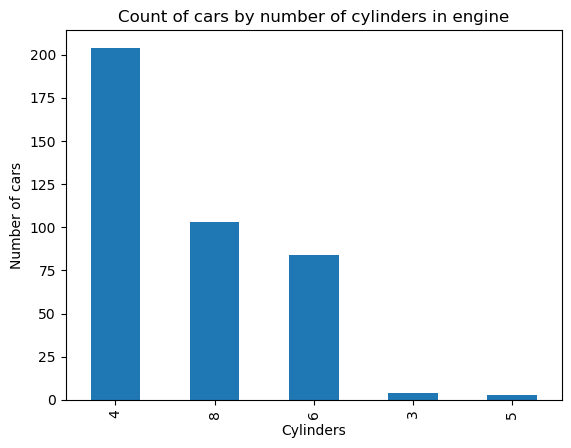

In [117]:

df['Cylinders'].value_counts().plot.bar()
plt.title('Count of cars by number of cylinders in engine')
plt.xlabel('Cylinders')
plt.ylabel('Number of cars')


7. Create a scatterplot that shows the relationship between horsepower and weight.

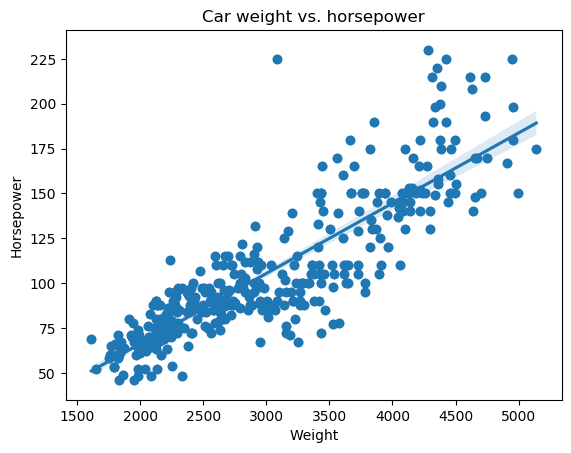

In [118]:
plt.scatter(df['Weight'], df['Horsepower'])
sn.regplot(df['Weight'], df['Horsepower'])
plt.title('Car weight vs. horsepower')
plt.xlabel('Weight')
plt.ylabel('Horsepower')
plt.show()

8. Ask, then answer (using matplotlib and seaborn graphics capabilities) an interesting question about the distribution of one of the variables, or the relationship between two (or more!) of the variables in the “Auto MPG” dataset.

#### Compare MPGs of vehicles by Origin:

In [119]:
origin_count = df['Origin']. value_counts()
origin_count

USA       249
Europe     79
Asia       70
Name: Origin, dtype: int64

In [120]:
origin_avg = df.groupby('Origin')['MPG'].mean()
origin_avg

Origin
Asia      27.891429
Europe    30.450633
USA       20.083534
Name: MPG, dtype: float64

#### Acceleration of car compared to its weight:

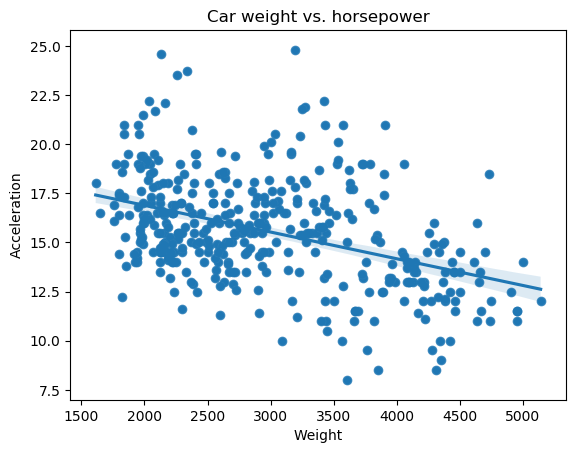

In [121]:
sn.scatterplot(df['Weight'], df['Acceleration'])
sn.regplot(df['Weight'], df['Acceleration'])
plt.title('Car weight vs. horsepower')
plt.xlabel('Weight')
plt.ylabel('Acceleration')
plt.show()